In [287]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib notebook
#%matplotlib widget

# Define the number of examples.
M = 1000

# Generate a linear-looking dataset.
X = 2 * np.random.rand(M, 1)
y = 4 + 3 * X + np.random.randn(M, 1)

# Generate values for parameters.
N = 200
a0 = np.linspace(-10.0, 14.0, N)
a1 = np.linspace(-10.0, 14.0, N)

A0, A1 = np.meshgrid(a0, a1)

# Generate points for plotting the cost-function surface.
J = np.zeros((N,N))
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A0[iter1][iter2] + A1[iter1][iter2]*X
        J[iter1][iter2] = (1/M)*np.sum( np.square(y - yhat)  )

# Add x0 = 1 to each instance.
X_b = np.c_[np.ones((M, 1)), X]

# Closed-form solution.
X = X_b
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
yhat = a_opt[0, 0] + a_opt[1, 0]*X
Joptimum = (1/M)*np.sum(np.power((y - yhat), 2) )

# Number of epochs.
n_epochs = 10
# Constant learning rate.
alpha_int = 0.1

def learning_schedule(eta_int, epoch):
    return eta_int*np.exp(-epoch)

# learning schedule hyperparameters
t0, t1 = 2, 25
def learning_schedule(t):
    return t0 / (t + t1)

# learning schedule hyperparameters
k = 0.00001
def learning_schedule(ls_type, alpha_int, k, t):
    if ls_type == 'exp':
        alpha = alpha_int * np.exp(-k*t)
    else:
        alpha = alpha_int
    return alpha

# Random initialization of parameters.
a = np.random.randn(2,1)
a[0] = -10
a[1] = -10

# Create vector for parameter history.
a_hist = np.zeros((2, n_epochs*M+1))
# Initialize history vector.
a_hist[0, 0] = a[0]
a_hist[1, 0] = a[1]

# Create vector to store eta history.
alpha_hist = np.zeros((n_epochs*M))

# Mini-batch size.
mb_size = 50

# Stocastic gradient-descent loop.
for epoch in range(n_epochs):
    for i in range(M):
        random_indexes = np.random.randint(M, size=mb_size)
        xi = X_b[random_indexes]
        yi = y[random_indexes]
        gradients = -2/mb_size*xi.T.dot(yi - xi.dot(a))
        alpha = learning_schedule('none', alpha_int, k, epoch*M + i)
        alpha_hist[epoch*M+i] = alpha
        a = a - alpha*gradients
        a_hist[0, epoch*M+i+1] = a[0]
        a_hist[1, epoch*M+i+1] = a[1]

<IPython.core.display.Javascript object>


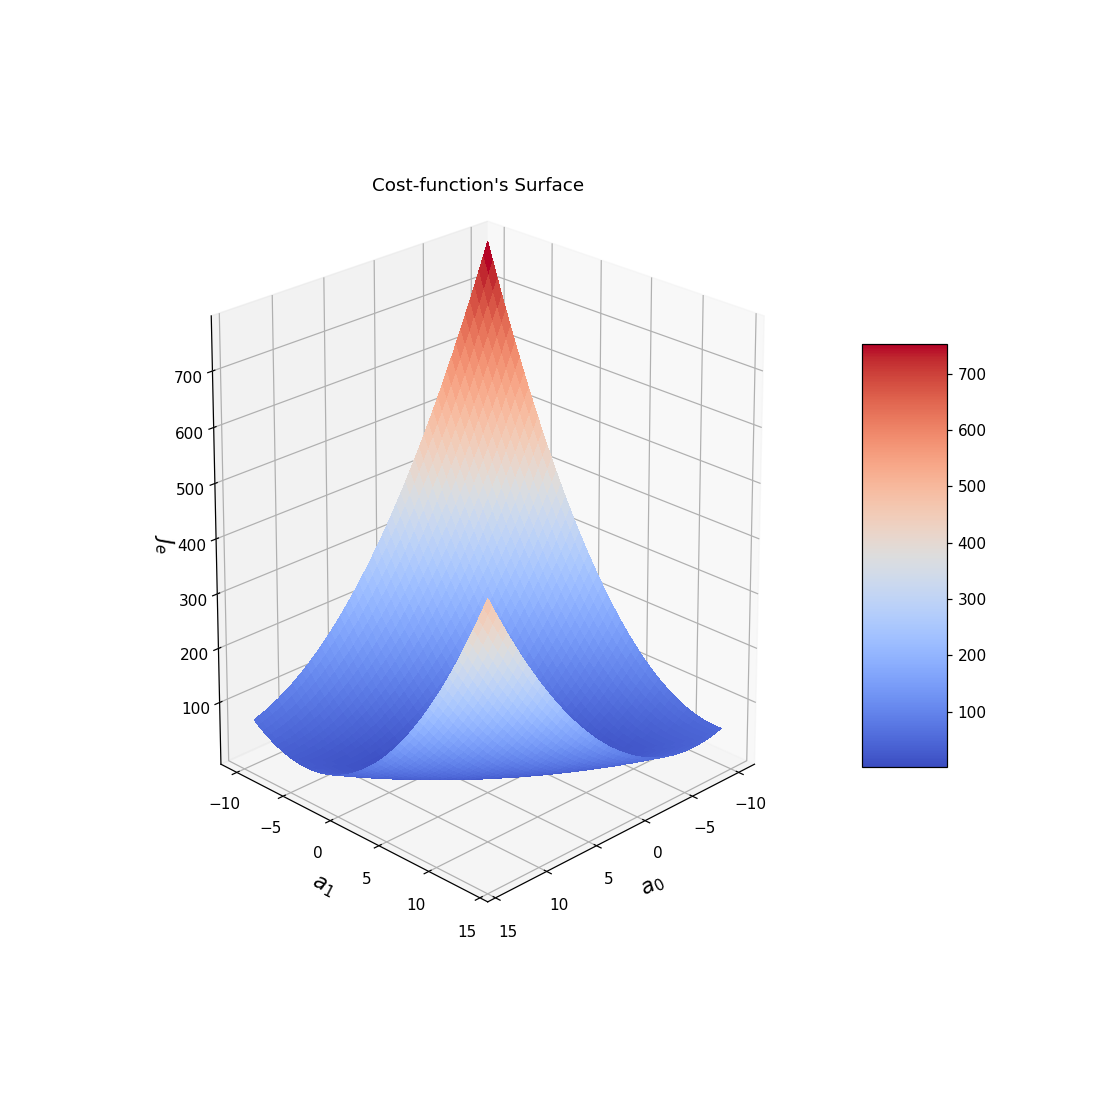

In [288]:
# Plot cost-function surface.
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A0, A1, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_0$', fontsize=14)
ax.set_ylabel('$a_1$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14)
plt.title('Cost-function\'s Surface')
ax.view_init(20, 45)
fig
#Show the plot.
plt.show()

plt.savefig("error_surface_mb_gd.png", dpi=600)

<IPython.core.display.Javascript object>


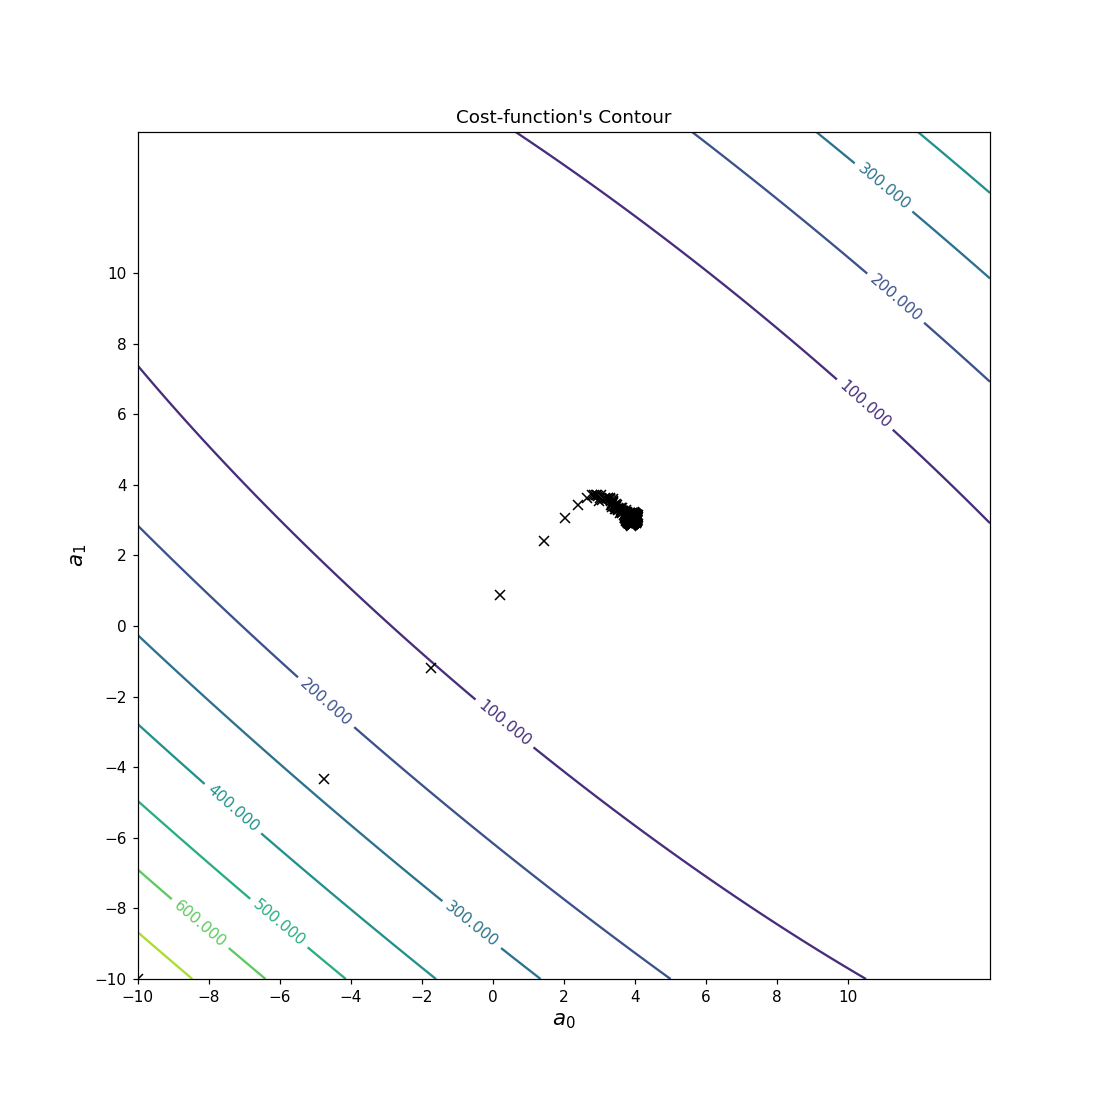

In [289]:
# Plot figure.        
fig = plt.figure(figsize=(10,10))
cp = plt.contour(A0, A1, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_0$', fontsize=14)
plt.ylabel('$a_1$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.plot(a_hist[0, :], a_hist[1, :], 'kx')
plt.xticks(np.arange(-10, 12, step=2.0))
plt.yticks(np.arange(-10, 12, step=2.0))
plt.show()

plt.savefig("error_contour_mb_gd.png", dpi=600)

In [290]:
# Print found values.
print('a0_opt: ' + str(a_opt[0, 0]))
print('a1_opt: ' + str(a_opt[1, 0]))

print('a0_sgd: ' + str(a[0, 0]))
print('a1_sgd: ' + str(a[1, 0]))

a0_opt: 3.923092151644287
a1_opt: 3.0420220315780213
a0_sgd: 3.834893382348317
a1_sgd: 3.0891050026350695


<IPython.core.display.Javascript object>


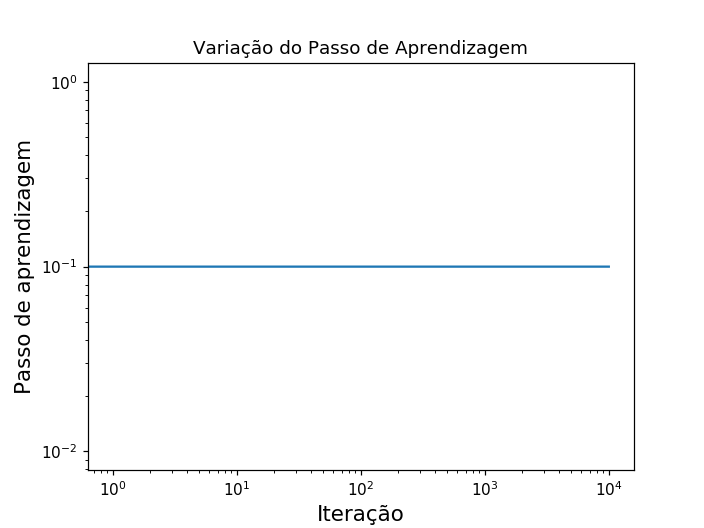

In [291]:
# Plot eta history     
fig = plt.figure()
plt.plot(range(0,n_epochs*M), alpha_hist)
plt.yscale("log")
plt.xscale("log")
plt.xlabel('Iteração', fontsize=14)
plt.ylabel('Passo de aprendizagem', fontsize=14)
plt.title('Variação do Passo de Aprendizagem')
plt.show()

plt.savefig("passo_de_aprendizagem_mb_gd.png", dpi=600)